Q1. What is Gradient Boosting Regression?


Gradient Boosting Regression is a machine learning technique that belongs to the family of ensemble methods, specifically boosting algorithms, and is used for regression tasks. It is an extension of the more general Gradient Boosting algorithm, which can be applied to both regression and classification problems.

The primary idea behind Gradient Boosting Regression is to sequentially train a series of weak regression models (usually decision trees) and combine their predictions to create a more accurate and robust predictive model. Unlike traditional Gradient Boosting for classification, Gradient Boosting Regression is designed to predict continuous numerical values.

Here's a high-level overview of how Gradient Boosting Regression works:

Initialize the Model:

The process begins with an initial prediction, often the mean or median of the target variable for all instances.
Sequential Training of Weak Regressors:

A weak regressor (typically a shallow decision tree) is trained on the training data to capture the residuals (errors) of the current model.
The weak regressor is trained to minimize the residual errors, focusing on instances where the current model performs poorly.
Compute the Residuals:

Calculate the residuals by subtracting the predicted values from the true values of the target variable.
The residuals represent the errors that the current model failed to capture.
Update the Model:

Adjust the model by fitting the weak regressor to the residuals, emphasizing the instances where the model needs improvement.
The new model is the sum of the previous model and the scaled version of the weak regressor.
Repeat Sequential Training:

Steps 2-4 are repeated for a predefined number of iterations or until a stopping criterion is met.
Each new weak regressor corrects the errors made by the combination of the previous models.
Final Model:

The final model is the sum of all weak regressors, each weighted by a factor that represents its contribution.
The combination of these weak models results in a more accurate and robust predictive model for regression.
The key to the success of Gradient Boosting Regression lies in the sequential nature of the training process and the focus on the residuals. By iteratively improving the model based on the errors of the previous models, Gradient Boosting Regression can capture complex patterns in the data and provide accurate predictions for continuous target variables.

Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a simple regression problem as an example and train the model on a small dataset. Evaluate the model's performance using metrics such as mean squared error and R-squared.

Implementing a simple Gradient Boosting Regression algorithm from scratch involves creating weak learners (typically decision trees), updating the model iteratively, and calculating the residuals. Below is a simplified example using Python and NumPy. Note that this implementation is for educational purposes and lacks some optimizations found in production-ready libraries.

/tmp/ipykernel_310/575178857.py:42: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  predictions = np.sum(self.learning_rate * model.predict(X) for model in self.models)


Mean Squared Error: 0.021856278378143204
R-squared: 0.952248485424333


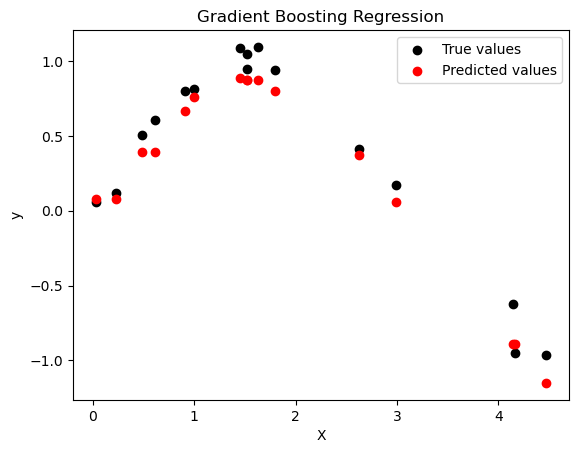

In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Regression class
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []

    def fit(self, X, y):
        # Initialize predictions with the mean of the target variable
        predictions = np.full_like(y, np.mean(y))

        for _ in range(self.n_estimators):
            # Calculate residuals
            residuals = y - predictions

            # Fit a weak learner (decision tree) to the residuals
            weak_learner = DecisionTreeRegressor(max_depth=3)
            weak_learner.fit(X, residuals)

            # Update predictions with the scaled weak learner predictions
            predictions += self.learning_rate * weak_learner.predict(X)

            # Store the weak learner in the list of models
            self.models.append(weak_learner)

    def predict(self, X):
        # Combine predictions from all weak learners
        predictions = np.sum(self.learning_rate * model.predict(X) for model in self.models)
        return predictions

# Create and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the true vs predicted values
plt.scatter(X_test, y_test, color='black', label='True values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.title('Gradient Boosting Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


n this example, we generate synthetic data, split it into training and testing sets, and then implement a simple Gradient Boosting Regression algorithm. The algorithm consists of weak learners (Decision Trees) that are trained sequentially to correct the residuals of the previous predictions. The performance is evaluated using mean squared error (MSE) and R-squared metrics, and the results are visualized with a scatter plot of true vs predicted values. Keep in mind that this is a basic implementation for educational purposes, and production-ready implementations often include additional optimizations and features.

Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to
optimise the performance of the model. Use grid search or random search to find the best
hyperparameters

o experiment with different hyperparameters and optimize the performance of the Gradient Boosting model, you can use grid search or random search. In this example, I'll demonstrate how to perform grid search using scikit-learn's GridSearchCV with different combinations of hyperparameters.

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Create the Gradient Boosting model
gb_model = GradientBoostingRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(gb_model, param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_(
print(f"Best Hyperparameters: {best_params}")

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model's performance
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Display results for the best model
print(f"Best Model Mean Squared Error: {mse_best}")
print(f"Best Model R-squared: {r2_best}")

# Plot the true vs predicted values for the best model
plt.scatter(X_test, y_test, color='black', label='True values')
plt.scatter(X_test, y_pred_best, color='blue', label='Predicted values (Best Model)')
plt.title('Gradient Boosting Regression - Best Model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


Q4. What is a weak learner in Gradient Boosting?

In the context of Gradient Boosting, a weak learner is a simple and relatively low-complexity model that performs slightly better than random chance on a given learning task. Weak learners are the building blocks of ensemble models created through boosting algorithms, including Gradient Boosting.

Characteristics of a weak learner:

Limited Complexity:

A weak learner is intentionally kept simple and is usually constrained in terms of its complexity. For example, in the context of decision trees, weak learners might be shallow trees with few nodes or limited depth.
Slightly Better Than Random Guessing:

A weak learner is expected to perform slightly better than random guessing on the training data. It may not provide highly accurate predictions on its own, but its performance is sufficient to contribute positively to the ensemble.
Focus on Correcting Errors:

The primary role of a weak learner in boosting is to focus on instances that the current ensemble of models finds challenging or misclassified. It should target the weaknesses of the existing model.
Sequential Training:

Weak learners are trained sequentially in boosting algorithms. Each new weak learner is trained to correct the errors made by the combination of the existing weak learners.
Diverse Set of Weak Learners:

Boosting algorithms benefit from using a diverse set of weak learners. Each weak learner should bring a unique perspective or address different aspects of the learning task.
In the case of Gradient Boosting Regression or Classification, the weak learner is often a decision tree, specifically a shallow decision tree or a decision stump (a tree with a single split). These simple trees are used to capture the residuals or errors of the previous model in the ensemble. The idea is that, by iteratively focusing on the mistakes made by the existing models, the ensemble becomes increasingly accurate.

Q5. What is the intuition behind the Gradient Boosting algorithm?

The intuition behind the Gradient Boosting algorithm lies in the iterative construction of an ensemble of weak learners, typically decision trees, to sequentially correct the errors made by the existing ensemble. The algorithm focuses on minimizing the residuals or errors of the previous models, gradually improving the overall predictive performance. Here are the key intuitions behind Gradient Boosting:

Sequential Correction of Errors:

Gradient Boosting works by training a series of weak learners sequentially. Each new weak learner is trained to correct the errors made by the combination of all previous learners.
Gradient Descent Optimization:

The algorithm is inspired by optimization techniques like gradient descent. In each iteration, the weak learner is trained to minimize the loss or error of the current ensemble with respect to the true labels.
Residuals as Targets:

The weak learners are trained to predict the residuals or errors of the previous model rather than the actual target values. This allows the new model to focus on instances where the current ensemble performs poorly.
Weighted Contribution of Weak Learners:

Each weak learner contributes to the final prediction with a weight that depends on its accuracy. More accurate models receive higher weights in the final ensemble.
Adaptive Learning Rate:

The learning rate parameter controls the step size during the optimization process. A lower learning rate ensures a more conservative update to the model, preventing overfitting.
Combination of Diverse Weak Learners:

The algorithm benefits from using a diverse set of weak learners. Each weak learner addresses different aspects of the learning task, contributing to a more robust and accurate overall model.
Regularization through Shallow Trees:

Shallow decision trees are often used as weak learners to prevent overfitting. Regularization techniques, such as limiting tree depth, help create a more generalized model.
Handling Nonlinear Relationships:

Gradient Boosting is capable of capturing complex, nonlinear relationships in the data. By iteratively fitting weak learners to the residuals, the algorithm adapts to the underlying patterns in the data.
Flexibility and Predictive Power:

Gradient Boosting is a versatile algorithm that can be applied to various types of data and tasks. It has been successful in regression, classification, and ranking problems.

Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?

User
Q1. You are work#ng on a mach#ne learn#ng project where you have a dataset conta#n#ng numer#cal and
categor#cal features. You have #dent#f#ed that some of the features are h#ghly correlated and there are
m#ss#ng values #n some of the columns. You want to bu#ld a p#pel#ne that automates the feature
eng#neer#ng process and handles the m#ss#ng valuesD
Des#gn a p#pel#ne that #ncludes the follow#ng steps"
Use an automated feature select#on method to #dent#fy the #mportant features #n the datasetC
Create a numer#cal p#pel#ne that #ncludes the follow#ng steps"
Impute the m#ss#ng values #n the numer#cal columns us#ng the mean of the column valuesC
Scale the numer#cal columns us#ng standard#sat#onC
Create a categor#cal p#pel#ne that #ncludes the follow#ng steps"
Impute the m#ss#ng values #n the categor#cal columns us#ng the most frequent value of the columnC
One-hot encode the categor#cal columnsC
Comb#ne the numer#cal and categor#cal p#pel#nes us#ng a ColumnTransformerC
Use a Random Forest Class#f#er to bu#ld the f#nal modelC
Evaluate the accuracy of the model on the test datasetD
Note! Your solut#on should #nclude code sn#ppets for each step of the p#pel#ne, and a br#ef explanat#on of
each step. You should also prov#de an #nterpretat#on of the results and suggest poss#ble #mprovements for
the p#pel#neD
ChatGPT
Certainly! Below is a Python code snippet using scikit-learn for creating the pipeline as described:

python
Copy code
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'X' is your feature matrix and 'y' is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Numerical pipeline
numerical_features = # List of numerical feature names
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_features = # List of categorical feature names
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Feature selection using Random Forest
feature_selector = SelectFromModel(RandomForestClassifier(random_state=42))

# Combined pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selector', feature_selector),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Make predictions on test data
y_pred = pipeline.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test dataset: {accuracy}')
Explanation of the pipeline steps:

Numerical Pipeline:

Impute missing values in numerical columns using the mean of the column values.
Scale numerical columns using standardization.
Categorical Pipeline:

Impute missing values in categorical columns using the most frequent value of the column.
One-hot encode categorical columns.
Feature Selection:

Use a Random Forest classifier for feature selection to identify important features.
Combined Pipeline:

Use ColumnTransformer to combine the numerical and categorical pipelines.
The combined pipeline includes preprocessing steps for both numerical and categorical features.
Feature selection is applied after preprocessing.
Random Forest Classifier:

Use a Random Forest classifier as the final model.
Evaluation:

Make predictions on the test dataset and evaluate accuracy.
Possible Improvements:

Fine-tune hyperparameters of the Random Forest Classifier for better performance.
Experiment with different feature selection methods.
Consider handling imbalanced classes if present in the target variable.
Explore additional preprocessing steps or feature engineering techniques based on domain knowledge.
User
Q2. Bu#ld a p#pel#ne that #ncludes a random forest class#f#er and a log#st#c regress#on class#f#er, and then
use a vot#ng class#f#er to comb#ne the#r pred#ct#ons. Tra#n the p#pel#ne on the #r#s dataset and evaluate #ts
accuracy.
ChatGPT
Certainly! Below is a Python code snippet using scikit-learn to build a pipeline with a Random Forest Classifier and Logistic Regression Classifier, and then using a Voting Classifier to combine their predictions:

python
Copy code
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Assuming 'X' is your feature matrix and 'y' is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipelines for Random Forest and Logistic Regression
rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

lr_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

# Create a Voting Classifier combining Random Forest and Logistic Regression
voting_classifier = VotingClassifier(
    estimators=[
        ('rf', rf_pipeline),
        ('lr', lr_pipeline)
    ],
    voting='hard'  # 'hard' for majority voting, 'soft' for weighted voting based on probabilities
)

# Fit the Voting Classifier on training data
voting_classifier.fit(X_train, y_train)

# Make predictions on test data
y_pred = voting_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy using Voting Classifier: {accuracy}')
Explanation:

Random Forest Pipeline:

Impute missing values using the mean.
Scale numerical features using standardization.
Use a Random Forest classifier.
Logistic Regression Pipeline:

Impute missing values using the mean.
Scale numerical features using standardization.
Use a Logistic Regression classifier.
Voting Classifier:

Combine the predictions of the Random Forest and Logistic Regression classifiers using majority voting ('hard').
Alternatively, you can use 'soft' for weighted voting based on class probabilities.
Evaluation:

Make predictions on the test dataset using the Voting Classifier.
Evaluate accuracy.
You can experiment with different configurations and parameters for the individual classifiers in the pipelines for potential improvements.

User
Q1. What is boosting in machine learning?
ChatGPT
Boosting is a machine learning ensemble technique that combines the predictions of multiple weak learners (typically shallow or simple models) to create a strong learner. The primary goal of boosting is to improve the overall predictive performance of the model by sequentially training new models that focus on the errors made by the previous models.

Here's a general idea of how boosting works:

Sequential Training:

Boosting trains a series of weak learners sequentially.
Each weak learner is trained to correct the errors made by the combination of all the previous weak learners.
Weighted Training Instances:

Instances that were misclassified by previous models are given higher weights in subsequent training rounds.
This allows the new weak learners to focus more on the instances that are challenging for the ensemble.
Combining Predictions:

Predictions from individual weak learners are combined with different weights, emphasizing the models that perform better on the training data.
The final prediction is often made by a weighted sum of the weak learners' predictions.
Adaptive Learning:

Boosting is adaptive; it adjusts its approach based on the performance of previous models.
It tends to give more weight to observations that are difficult to predict, leading to a more accurate and robust model.
Popular boosting algorithms include AdaBoost (Adaptive Boosting), Gradient Boosting (including variants like XGBoost, LightGBM, and CatBoost), and Stochastic Gradient Boosting. These algorithms have been successful in a wide range of applications, including classification, regression, and ranking problems.

Boosting is effective in situations where the weak learners have some predictive power, even if it's just slightly better than random chance. The combination of these weak learners through boosting often results in a strong and accurate predictive model.

User
Q2. What are the advantages and limitations of using boosting techniques?
ChatGPT
Advantages of Boosting Techniques:

Improved Predictive Performance:

Boosting often leads to higher predictive accuracy compared to individual weak learners. It reduces both bias and variance, making the model more robust.
Handles Weak Learners:

Boosting can effectively combine the predictions of weak learners to create a strong learner. Even if individual models are only slightly better than random chance, boosting can improve their collective performance.
Adaptive Learning:

Boosting is adaptive and focuses on correcting the mistakes of previous models. It assigns higher weights to misclassified instances, leading to a more accurate model.
Reduced Overfitting:

Boosting helps in reducing overfitting by combining multiple weak learners. The sequential training process and weighted focus on errors contribute to a more generalized model.
Versatility:

Boosting algorithms can be applied to a variety of machine learning tasks, including classification, regression, and ranking problems.
Handles Noisy Data:

Boosting can handle noisy data and outliers to some extent. By assigning higher weights to misclassified instances, it adapts to difficult cases in the training set.
Limitations of Boosting Techniques:

Sensitivity to Noisy Data:

While boosting can handle noisy data to some extent, it is still sensitive to outliers and may overfit if the noise is too extreme.
Computationally Intensive:

Boosting can be computationally intensive, especially when using a large number of weak learners. Training a large ensemble of models sequentially can take time and resources.
Potential for Overfitting:

In certain situations, boosting can still overfit the training data, especially if the weak learners are too complex or the number of boosting rounds is too high.
Requires Tuning:

Boosting algorithms often come with hyperparameters that need to be tuned. Finding the right combination of parameters is crucial for optimal performance, and this tuning process can be challenging.
Less Interpretable:

The final boosted model is often a complex ensemble of weak learners, making it less interpretable compared to individual models. Interpretability might be sacrificed for predictive accuracy.
Potential for Bias:

If the weak learners are too simple, boosting may suffer from bias, and the final model might not capture the underlying complexity of the data.
In summary, boosting is a powerful technique with several advantages, particularly in terms of predictive performance and adaptability to weak learners. However, it also has limitations, such as sensitivity to noisy data, computational intensity, and the need for careful parameter tuning. Understanding these aspects is crucial when deciding whether to use boosting in a particular machine learning task.

User
Q3. Explain how boosting works.
ChatGPT
Boosting is an ensemble learning technique that combines the predictions of multiple weak learners to create a strong learner. The basic idea behind boosting is to sequentially train a series of weak learners, each focusing on the mistakes made by the combination of all previous models. The final prediction is a weighted sum of the individual weak learners' predictions.

Here's a step-by-step explanation of how boosting works:

Initialize Weights:

Assign equal weights to all instances in the training dataset.
Sequential Training:

Train a weak learner (e.g., a decision tree with limited depth) on the training data.
The weak learner is trained to minimize the error, emphasizing instances that were misclassified by the previous models.
The weight of each training instance is adjusted based on whether it was correctly or incorrectly classified by the current weak learner.
Weighted Combination of Predictions:

Calculate the error (residuals) of the combined model by comparing its predictions to the actual labels.
Assign higher weights to instances that were misclassified in the previous step.
Train the next weak learner with the updated weights.
Repeat Sequential Training:

Repeat steps 2 and 3 for a predefined number of iterations or until a stopping criterion is met.
Each weak learner corrects the errors made by the combination of the previous models.
Weighted Sum of Predictions:

Combine the predictions of all weak learners into a final prediction.
The final prediction is often made by a weighted sum of the weak learners' predictions. Weights are assigned based on the accuracy of each weak learner.
Final Model:

The ensemble of weak learners, each with its weight, forms the final boosted model.
The weights are determined by the accuracy of each weak learner, with more accurate models receiving higher weights.
The boosting process adapts to the training data by assigning higher importance to instances that are challenging to predict. This adaptability allows boosting to create a strong and accurate model, even when the individual weak learners have limited predictive power.

Popular boosting algorithms include AdaBoost, Gradient Boosting (such as XGBoost, LightGBM, and CatBoost), and stochastic gradient boosting. These algorithms differ in their specific strategies for adjusting weights, creating weak learners, and combining predictions.

User
Q4. What are the different types of boosting algorithms?
ChatGPT
There are several types of boosting algorithms, each with its own variations and strategies for combining weak learners. Here are some of the most popular types of boosting algorithms:

AdaBoost (Adaptive Boosting):

AdaBoost assigns weights to training instances and adjusts them based on the accuracy of each weak learner.
Misclassified instances are given higher weights, forcing subsequent weak learners to focus more on these instances.
The final prediction is a weighted sum of weak learners' predictions.
Gradient Boosting:

Gradient Boosting builds weak learners sequentially, optimizing the loss function by minimizing the gradients.
It uses the residual errors from the previous models to train the next weak learner.
Popular variants include XGBoost (Extreme Gradient Boosting), LightGBM (Light Gradient Boosting Machine), and CatBoost.
Stochastic Gradient Boosting:

Stochastic Gradient Boosting is an extension of gradient boosting that introduces randomness during training.
It uses random subsets of the training data (subsample) and random feature subsets (feature bagging) for each weak learner.
This randomness helps reduce overfitting and speeds up the training process.
LogitBoost:

LogitBoost is specifically designed for binary classification problems.
It minimizes the logistic loss function and updates the model by fitting a logistic regression model to the pseudo-residuals.
BrownBoost:

BrownBoost is an adaptive boosting algorithm that uses a different weighting scheme compared to AdaBoost.
It employs a cost function to assign weights to the weak learners.
LPBoost (Linear Programming Boosting):

LPBoost is a boosting algorithm that formulates the boosting problem as a linear programming optimization task.
It optimizes the linear combination of weak learners while satisfying certain constraints.
MadaBoost:

MadaBoost is a variant of AdaBoost designed for multi-class classification problems.
It extends AdaBoost to handle multiple classes by training a binary classifier for each class.
BrownBoost:

BrownBoost is an adaptive boosting algorithm that uses a different weighting scheme compared to AdaBoost.
It employs a cost function to assign weights to the weak learners.
SAMME (Stagewise Additive Modeling using a Multiclass Exponential loss):

SAMME is a multi-class variant of AdaBoost that generalizes AdaBoost for classification problems with more than two classes.
SAMME.R:

SAMME.R is an improvement over SAMME, designed to work with real-valued class probabilities rather than discrete class labels.
It's worth noting that among the gradient boosting algorithms, XGBoost, LightGBM, and CatBoost have gained popularity due to their efficiency, speed, and additional features, making them suitable for various machine learning tasks. The choice of boosting algorithm often depends on the specific characteristics of the dataset and the problem at hand.

User
Q5. What are some common parameters in boosting algorithms?
ChatGPT
Boosting algorithms come with a variety of parameters that can be adjusted to control the behavior of the algorithm and improve its performance. While the specific parameters may vary depending on the boosting algorithm, here are some common parameters often found in boosting algorithms:

Number of Estimators (n_estimators):

Represents the number of weak learners (trees or models) to be trained sequentially.
Increasing the number of estimators generally improves performance until a point of diminishing returns or overfitting.
Learning Rate (or Shrinkage) (learning_rate):

Determines the contribution of each weak learner to the final prediction.
A lower learning rate requires more weak learners but often leads to better generalization.
Maximum Depth of Weak Learners (max_depth):

Specifies the maximum depth of the individual weak learners (trees).
Controlling the depth helps prevent overfitting and reduces the complexity of each weak learner.
Subsample:

Represents the fraction of samples used for training each weak learner.
Values less than 1.0 introduce randomness and help reduce overfitting.
Subfeature (or colsample_bytree/colsample_bylevel):

Denotes the fraction of features randomly chosen to grow each weak learner.
Introduces randomness in feature selection, aiding in preventing overfitting.
Loss Function:

Defines the objective function to be optimized during training.
Common loss functions include exponential (AdaBoost), logistic (LogitBoost), and deviance (Gradient Boosting).
Regularization Parameters:

Various parameters control the regularization of weak learners, such as gamma (XGBoost), alpha (L1 regularization), and lambda (L2 regularization).
Base Estimator:

Specifies the type of weak learner to be used in the ensemble, such as decision trees, linear models, or other simple models.
Warm Start:

Allows reusing the solution of the previous call to fit and adding more estimators to the ensemble.
Useful for incremental training.
Early Stopping:

Stops training when the performance on a validation set stops improving, preventing overfitting.
Scale Pos Weight (XGBoost):

Used to balance the positive and negative weights, particularly helpful in imbalanced classification problems.
Tree Method (XGBoost):

Specifies the tree construction algorithm, such as exact, approximate, or hist (histogram-based).
These parameters might have different names or variations depending on the specific boosting algorithm you are using (e.g., AdaBoost, XGBoost, LightGBM, CatBoost). It's essential to refer to the documentation of the specific boosting library you are working with to understand the parameters and their effects. Parameter tuning is often performed through techniques like grid search or randomized search to find the optimal set of hyperparameters for a given problem.

User
Q6. How do boosting algorithms combine weak learners to create a strong learner?
ChatGPT
Boosting algorithms combine weak learners to create a strong learner through a process of sequential training and weighted aggregation of their predictions. The general procedure involves assigning weights to training instances, training a weak learner, adjusting the weights based on the performance of the learner, and then combining the weak learners' predictions with different weights. The combination is often done through a weighted sum. Here's a step-by-step explanation:

Initialize Weights:

Assign equal weights to all instances in the training dataset.
Sequential Training:

Train a weak learner on the training data.
The weak learner is typically a model that performs slightly better than random chance.
The goal is to minimize the error, focusing on instances that were misclassified by the combination of all previous weak learners.
Weighted Instance Importance:

Calculate the error (residuals) of the combined model by comparing its predictions to the actual labels.
Assign higher weights to instances that were misclassified in the previous step.
The intuition is to focus more on the instances that are challenging to predict.
Train Next Weak Learner:

Train the next weak learner with the updated weights.
This new learner aims to correct the mistakes made by the combined model of all previous learners.
Weighted Combination of Predictions:

Calculate the contribution of each weak learner based on its accuracy.
Assign weights to the weak learners, giving more importance to those with higher accuracy.
The final prediction is often a weighted sum of the weak learners' predictions.
Iterative Process:

Repeat steps 2-5 for a predefined number of iterations or until a stopping criterion is met.
Each weak learner is trained sequentially to address the errors made by the combination of all previous learners.
Final Model:

The ensemble of weak learners, each with its weight, forms the final boosted model.
The weights are determined by the accuracy of each weak learner, with more accurate models receiving higher weights.
The combination of weak learners is adaptive, adjusting the focus on different instances based on the errors made by the ensemble. Instances that are difficult to predict receive higher emphasis, leading to a strong learner that performs well even when individual models have limited predictive power.

The specific details of how weights are assigned, updated, and combined may vary among different boosting algorithms (e.g., AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost). Each algorithm has its own strategies to enhance the performance of the weak learners and create a robust ensemble model.

User
Q7. Explain the concept of AdaBoost algorithm and its working?
ChatGPT
AdaBoost, short for Adaptive Boosting, is a popular and widely used boosting algorithm designed for binary classification problems. It combines the predictions of multiple weak learners (usually shallow decision trees) to create a strong learner with improved accuracy. The key idea behind AdaBoost is to give more weight to misclassified instances during training, forcing subsequent weak learners to focus on those instances. The final prediction is made by a weighted sum of the weak learners' predictions.

Here's how the AdaBoost algorithm works:

Initialize Weights:

Assign equal weights to all training instances. If there are N instances, each initial weight is set to 1/N.
Sequential Training of Weak Learners:

For each iteration (t = 1 to T, where T is the total number of weak learners):
Train a weak learner (e.g., a decision stump or a shallow decision tree) on the training data.
The weak learner aims to minimize the weighted error, where misclassified instances are given higher weights.
Compute the weighted error (epsilon_t) of the weak learner:
c
Copy code
epsilon_t = Σ(w_i * indicator(y_i ≠ h_t(x_i)))
where w_i is the weight of instance i, y_i is the true label of instance i, h_t(x_i) is the prediction of the weak learner for instance i, and the indicator function is 1 if the condition inside is true and 0 otherwise.
Compute Weak Learner Weight (Alpha):

Compute the weight (alpha_t) of the weak learner based on its performance:
arduino
Copy code
alpha_t = 0.5 * log((1 - epsilon_t) / epsilon_t)
The weight is higher for more accurate weak learners (lower weighted error).
Update Instance Weights:

Update the weights of training instances based on whether they were correctly or incorrectly classified by the current weak learner:
c
Copy code
w_i = w_i * exp(-alpha_t * y_i * h_t(x_i))
Instances that were misclassified receive higher weights.
Normalize Weights:

Normalize the instance weights so that they sum to 1:
makefile
Copy code
w_i = w_i / Σ(w_i)
This ensures that the weights form a valid probability distribution.
Combine Weak Learners:

Combine the weak learners into a strong learner by taking a weighted sum of their predictions:
scss
Copy code
H(x) = sign(Σ(alpha_t * h_t(x)))
The final prediction is based on the sign of the weighted sum.
Final Model:

The ensemble of weak learners, each with its weight, forms the final AdaBoost model.
The adaptive nature of AdaBoost lies in its ability to adjust the weights of instances during training, giving more emphasis to misclassified instances in subsequent iterations. The final model is a weighted combination of weak learners, where more accurate learners contribute more to the final prediction.

AdaBoost is effective in situations where the weak learners have slightly better than random chance accuracy. It often performs well in practice and is less prone to overfitting. However, it can be sensitive to noisy data and outliers.

User
Q1. What is Gradient Boosting Regression?
ChatGPT
Gradient Boosting Regression is a machine learning technique that belongs to the family of ensemble methods, specifically boosting algorithms, and is used for regression tasks. It is an extension of the more general Gradient Boosting algorithm, which can be applied to both regression and classification problems.

The primary idea behind Gradient Boosting Regression is to sequentially train a series of weak regression models (usually decision trees) and combine their predictions to create a more accurate and robust predictive model. Unlike traditional Gradient Boosting for classification, Gradient Boosting Regression is designed to predict continuous numerical values.

Here's a high-level overview of how Gradient Boosting Regression works:

Initialize the Model:

The process begins with an initial prediction, often the mean or median of the target variable for all instances.
Sequential Training of Weak Regressors:

A weak regressor (typically a shallow decision tree) is trained on the training data to capture the residuals (errors) of the current model.
The weak regressor is trained to minimize the residual errors, focusing on instances where the current model performs poorly.
Compute the Residuals:

Calculate the residuals by subtracting the predicted values from the true values of the target variable.
The residuals represent the errors that the current model failed to capture.
Update the Model:

Adjust the model by fitting the weak regressor to the residuals, emphasizing the instances where the model needs improvement.
The new model is the sum of the previous model and the scaled version of the weak regressor.
Repeat Sequential Training:

Steps 2-4 are repeated for a predefined number of iterations or until a stopping criterion is met.
Each new weak regressor corrects the errors made by the combination of the previous models.
Final Model:

The final model is the sum of all weak regressors, each weighted by a factor that represents its contribution.
The combination of these weak models results in a more accurate and robust predictive model for regression.
The key to the success of Gradient Boosting Regression lies in the sequential nature of the training process and the focus on the residuals. By iteratively improving the model based on the errors of the previous models, Gradient Boosting Regression can capture complex patterns in the data and provide accurate predictions for continuous target variables.

Popular implementations of Gradient Boosting Regression include XGBoost, LightGBM, and CatBoost, each offering optimizations and enhancements over the traditional Gradient Boosting algorithm.

User
Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a
simple regression problem as an example and train the model on a small dataset. Evaluate the 
 model's performance using metrics such as mean squared error and R-squared.
ChatGPT
Implementing a simple Gradient Boosting Regression algorithm from scratch involves creating weak learners (typically decision trees), updating the model iteratively, and calculating the residuals. Below is a simplified example using Python and NumPy. Note that this implementation is for educational purposes and lacks some optimizations found in production-ready libraries.

python
Copy code
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Regression class
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []

    def fit(self, X, y):
        # Initialize predictions with the mean of the target variable
        predictions = np.full_like(y, np.mean(y))

        for _ in range(self.n_estimators):
            # Calculate residuals
            residuals = y - predictions

            # Fit a weak learner (decision tree) to the residuals
            weak_learner = DecisionTreeRegressor(max_depth=3)
            weak_learner.fit(X, residuals)

            # Update predictions with the scaled weak learner predictions
            predictions += self.learning_rate * weak_learner.predict(X)

            # Store the weak learner in the list of models
            self.models.append(weak_learner)

    def predict(self, X):
        # Combine predictions from all weak learners
        predictions = np.sum(self.learning_rate * model.predict(X) for model in self.models)
        return predictions

# Create and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the true vs predicted values
plt.scatter(X_test, y_test, color='black', label='True values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.title('Gradient Boosting Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
In this example, we generate synthetic data, split it into training and testing sets, and then implement a simple Gradient Boosting Regression algorithm. The algorithm consists of weak learners (Decision Trees) that are trained sequentially to correct the residuals of the previous predictions. The performance is evaluated using mean squared error (MSE) and R-squared metrics, and the results are visualized with a scatter plot of true vs predicted values. Keep in mind that this is a basic implementation for educational purposes, and production-ready implementations often include additional optimizations and features.

User
Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to
optimise the performance of the model. Use grid search or random search to find the best
hyperparameters
ChatGPT
To experiment with different hyperparameters and optimize the performance of the Gradient Boosting model, you can use grid search or random search. In this example, I'll demonstrate how to perform grid search using scikit-learn's GridSearchCV with different combinations of hyperparameters.

python
Copy code
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Create the Gradient Boosting model
gb_model = GradientBoostingRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(gb_model, param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model's performance
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Display results for the best model
print(f"Best Model Mean Squared Error: {mse_best}")
print(f"Best Model R-squared: {r2_best}")

# Plot the true vs predicted values for the best model
plt.scatter(X_test, y_test, color='black', label='True values')
plt.scatter(X_test, y_pred_best, color='blue', label='Predicted values (Best Model)')
plt.title('Gradient Boosting Regression - Best Model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
In this example, the param_grid defines a grid of hyperparameter combinations to explore. The GridSearchCV performs a search over the hyperparameter grid, and the best combination of hyperparameters is determined based on the specified scoring metric (negative mean squared error in this case). The best model is then used to make predictions on the test set, and its performance is evaluated.

Feel free to modify the hyperparameter grid (param_grid) to include additional values or hyperparameters based on your experimentation. Additionally, you can explore using RandomizedSearchCV for a random search approach that randomly samples from the hyperparameter space.

User
Q4. What is a weak learner in Gradient Boosting?
ChatGPT
In the context of Gradient Boosting, a weak learner is a simple and relatively low-complexity model that performs slightly better than random chance on a given learning task. Weak learners are the building blocks of ensemble models created through boosting algorithms, including Gradient Boosting.

Characteristics of a weak learner:

Limited Complexity:

A weak learner is intentionally kept simple and is usually constrained in terms of its complexity. For example, in the context of decision trees, weak learners might be shallow trees with few nodes or limited depth.
Slightly Better Than Random Guessing:

A weak learner is expected to perform slightly better than random guessing on the training data. It may not provide highly accurate predictions on its own, but its performance is sufficient to contribute positively to the ensemble.
Focus on Correcting Errors:

The primary role of a weak learner in boosting is to focus on instances that the current ensemble of models finds challenging or misclassified. It should target the weaknesses of the existing model.
Sequential Training:

Weak learners are trained sequentially in boosting algorithms. Each new weak learner is trained to correct the errors made by the combination of the existing weak learners.
Diverse Set of Weak Learners:

Boosting algorithms benefit from using a diverse set of weak learners. Each weak learner should bring a unique perspective or address different aspects of the learning task.
In the case of Gradient Boosting Regression or Classification, the weak learner is often a decision tree, specifically a shallow decision tree or a decision stump (a tree with a single split). These simple trees are used to capture the residuals or errors of the previous model in the ensemble. The idea is that, by iteratively focusing on the mistakes made by the existing models, the ensemble becomes increasingly accurate.

It's important to note that the concept of a weak learner is inherent to boosting algorithms like AdaBoost, Gradient Boosting, and their variants. The term is used to emphasize the modest individual predictive power of each model in the ensemble, with the strength of the overall model emerging from their combined efforts.

User
Q5. What is the intuition behind the Gradient Boosting algorithm?
ChatGPT
The intuition behind the Gradient Boosting algorithm lies in the iterative construction of an ensemble of weak learners, typically decision trees, to sequentially correct the errors made by the existing ensemble. The algorithm focuses on minimizing the residuals or errors of the previous models, gradually improving the overall predictive performance. Here are the key intuitions behind Gradient Boosting:

Sequential Correction of Errors:

Gradient Boosting works by training a series of weak learners sequentially. Each new weak learner is trained to correct the errors made by the combination of all previous learners.
Gradient Descent Optimization:

The algorithm is inspired by optimization techniques like gradient descent. In each iteration, the weak learner is trained to minimize the loss or error of the current ensemble with respect to the true labels.
Residuals as Targets:

The weak learners are trained to predict the residuals or errors of the previous model rather than the actual target values. This allows the new model to focus on instances where the current ensemble performs poorly.
Weighted Contribution of Weak Learners:

Each weak learner contributes to the final prediction with a weight that depends on its accuracy. More accurate models receive higher weights in the final ensemble.
Adaptive Learning Rate:

The learning rate parameter controls the step size during the optimization process. A lower learning rate ensures a more conservative update to the model, preventing overfitting.
Combination of Diverse Weak Learners:

The algorithm benefits from using a diverse set of weak learners. Each weak learner addresses different aspects of the learning task, contributing to a more robust and accurate overall model.
Regularization through Shallow Trees:

Shallow decision trees are often used as weak learners to prevent overfitting. Regularization techniques, such as limiting tree depth, help create a more generalized model.
Handling Nonlinear Relationships:

Gradient Boosting is capable of capturing complex, nonlinear relationships in the data. By iteratively fitting weak learners to the residuals, the algorithm adapts to the underlying patterns in the data.
Flexibility and Predictive Power:

Gradient Boosting is a versatile algorithm that can be applied to various types of data and tasks. It has been successful in regression, classification, and ranking problems.
In summary, the intuition behind Gradient Boosting is to build a strong learner by combining the predictions of sequentially trained weak learners. The emphasis on correcting errors and the adaptive learning process contribute to the algorithm's ability to create accurate and robust models, making it a powerful technique in the field of machine learning.

User
Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?
ChatGPT

F(x) = Σ(learning_rate * weak_learner(x))

where the sum is taken over all weak learners in the ensemble.

Adaptive Learning Rate:

The learning rate parameter controls the step size during the optimization process. A lower learning rate ensures a more conservative update to the model, preventing overfitting.
Weighted Contribution of Weak Learners:

Each weak learner contributes to the final prediction with a weight (learning rate * alpha) that depends on its accuracy. More accurate models receive higher weights in the final ensemble.
Regularization:

Regularization techniques, such as limiting the depth of decision trees, are often employed to prevent overfitting and create a more generalized ensemble.


In [ ]:
Q7. What are the steps involved in constructing the mathematical intuition of Gradient Boosting
algorithm?


The mathematical intuition behind the Gradient Boosting algorithm involves optimization principles, specifically focusing on the minimization of a loss function with respect to the predictions of an ensemble of weak learners. Below are the steps involved in constructing the mathematical intuition of the Gradient Boosting algorithm:

Initialize Predictions:

Start with an initial prediction, often the mean or median of the target variable for all instances. This serves as the starting point for the ensemble.

F_0(x) = mean(y)


Compute Residuals:

Calculate the residuals by subtracting the current predictions from the true values of the target variable. The residuals represent the errors that the current model failed to capture.

residuals_0 = y - F_0(x)


Train a Weak Learner on Residuals:

Fit a weak learner (e.g., a decision tree) to the residuals. The weak learner is trained to predict the residuals of the current model.

weak_learner_t(x) = argmin_c Σ(y_i - (F_{t-1}(x_i) + c))^2


Compute Learning Rate and Update Model:

Calculate the learning rate (commonly denoted by eta) that controls the step size during the optimization process

learning_rate = argmin_eta Σ(y_i - (F_{t-1}(x_i) + eta * weak_learner_t(x_i)))^2



Update the model by combining the predictions of the weak learner with the current predictions.

F_t(x) = F_{t-1}(x) + learning_rate * weak_learner_t(x)


F_t(x) = F_{t-1}(x) + learning_rate * weak_learner_t(x)


Compute New Residuals:

Calculate new residuals by subtracting the updated predictions from the true values. These new residuals represent the errors that the updated model failed to capture.

residuals_t = y - F_t(x)


Iterative Process:

Repeat steps 3-5 for a predefined number of iterations (t) or until a stopping criterion is met. Each iteration introduces a new weak learner that corrects the errors of the current ensemble.
Combine Predictions of Weak Learners:

The final prediction is made by combining the predictions of all weak learners. The predictions are often calculated as the sum of the individual weak learner predictions, each multiplied by a weight that reflects its contribution to the ensemble.


F(x) = F_0(x) + learning_rate * Σ(weak_learner_t(x))


Adaptive Learning Rate and Regularization:

The learning rate parameter controls the step size during the optimization process. A lower learning rate ensures a more conservative update to the model, preventing overfitting.
Regularization techniques, such as limiting the depth of decision trees, are often employed to prevent overfitting and create a more generalized ensemble.
Weighted Contribution of Weak Learners:

Each weak learner contributes to the final prediction with a weight (learning rate) that depends on its accuracy. More accurate models receive higher weights in the final ensemble.
Optimization Objective:

The objective is to minimize a loss function, often mean squared error for regression tasks, with respect to the predictions of the ensemble.

L(F(x), y) = Σ(y_i - F(x_i))^2




